In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import torch
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import BayesianRidge, LinearRegression

from models import TIUReg

In [42]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})

# Experiment 1

In [90]:
X_train/X_train.max(0)[0]

tensor([[0.8524, 0.7402, 0.5908, 0.7743],
        [0.1524, 0.7229, 0.5020, 0.6216],
        [0.3952, 0.1767, 0.7827, 0.9171],
        ...,
        [0.1990, 0.5033, 0.4342, 0.2098],
        [0.4923, 0.7807, 0.7679, 0.8645],
        [0.8052, 0.3935, 0.2343, 0.3535]])

In [89]:
X_train.max(0)[0].shape

torch.Size([4])

In [68]:
data = pd.read_csv('data/exp1_data_train_1.csv')
data_test = pd.read_csv('data/exp1_data_test_1.csv')
variable_names = ['one','two','three','four']

X_train, X_test = data[variable_names].values, data_test[variable_names].values
Y_train, Y_test = data.y.values, data_test.y.values

np.round(np.cov(data[variable_names].values.T))

array([[813.,  -8.,  -2.,  11.],
       [ -8., 800.,  34., -54.],
       [ -2.,  34., 837., -30.],
       [ 11., -54., -30., 829.]])

In [69]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
Y_train = torch.from_numpy(Y_train).unsqueeze(-1).float()
Y_test = torch.from_numpy(Y_test).unsqueeze(-1) .float()

In [70]:
S_train = torch.diag_embed(torch.from_numpy(pd.read_csv('data/exp1_data_train_s_1.csv').values).float())**2
S_test = torch.diag_embed(torch.from_numpy(pd.read_csv('data/exp1_data_test_s_1.csv').values).float())**2
#S_ = torch.from_numpy(np.cov(data[variable_names].values.T))
#S_train = S_.unsqueeze(0).repeat([X_train.size(0),1,1])
#S_test = S_.unsqueeze(0).repeat([X_test.size(0),1,1])

#S_train /= S_train.max()
#S_test /= S_test.max()

S_train[0]

tensor([[0.2500, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0400, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0100]])

## Linear regression

In [71]:
model_lr = LinearRegression(fit_intercept=False)
model_lr.fit(X_train,Y_train.squeeze())
mean_squared_error(model_lr.predict(X_test),Y_test.squeeze()).item()

11.445998191833496

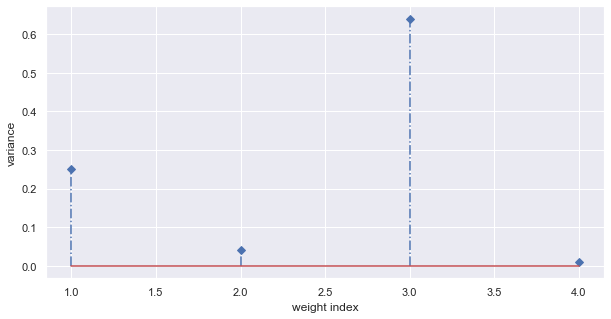

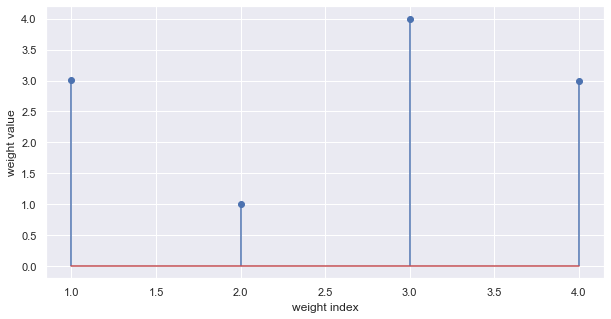

In [72]:
plt.stem([1,2,3,4],torch.diag(S_train[0]).numpy(),markerfmt='D',linefmt='-.')
plt.xlabel("weight index")
plt.ylabel("variance")
plt.show()
plt.stem([1,2,3,4],model_lr.coef_)
plt.xlabel("weight index")
plt.ylabel("weight value")
plt.show()

## Bayesian Ridge Regression (SK learn)

In [73]:
model_brr = BayesianRidge(fit_intercept=False)
model_brr.fit(X_train,Y_train.squeeze())

BayesianRidge(fit_intercept=False)

In [74]:
mean_squared_error(model_brr.predict(X_test),Y_test.squeeze()).item()

11.446060332656987

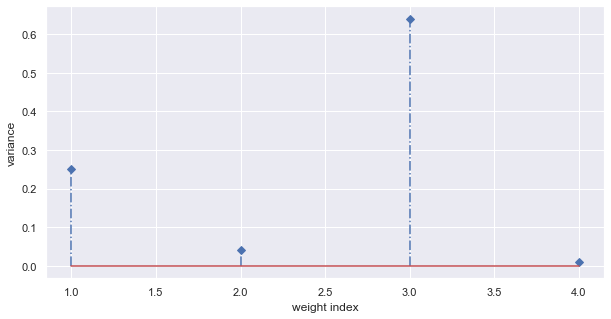

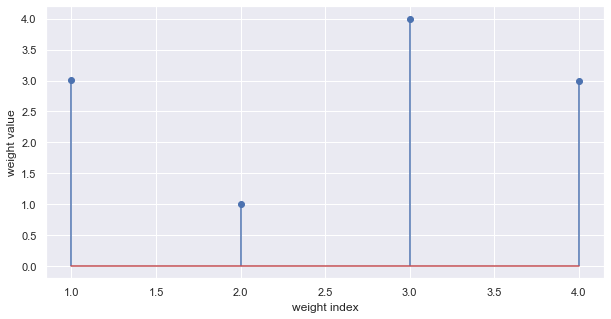

In [75]:
plt.stem([1,2,3,4],torch.diag(S_train[0]).numpy(),markerfmt='D',linefmt='-.')
plt.xlabel("weight index")
plt.ylabel("variance")
plt.show()
plt.stem([1,2,3,4],model_brr.coef_)
plt.xlabel("weight index")
plt.ylabel("weight value")
plt.show()

## Our method

Negative log likelihood: 1092.443142695427


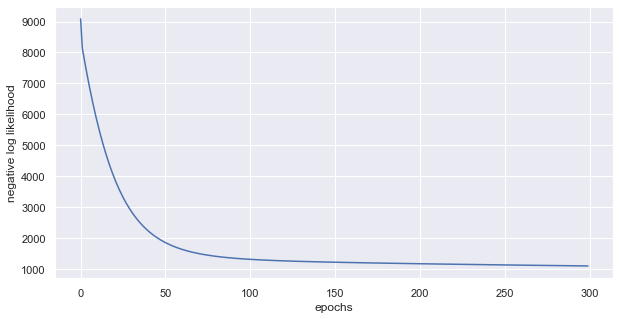

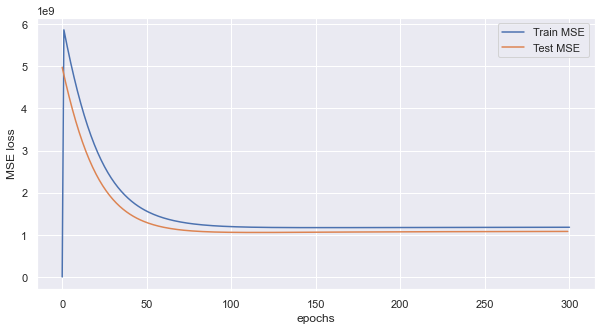

1081001856.0

In [79]:
model_tiu = TIUReg()
model_tiu.fit(X_train,Y_train,S_train.float(),X_test,Y_test,n_iter=300,lr=1e-3,viz=True)
mean_squared_error(model_tiu.predict(X_test).detach(),Y_test).item()

Negative log likelihood: 691.3561594057084


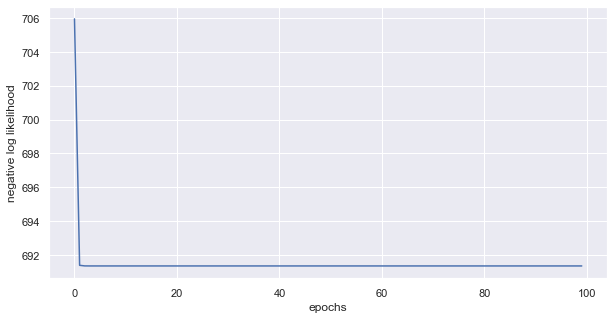

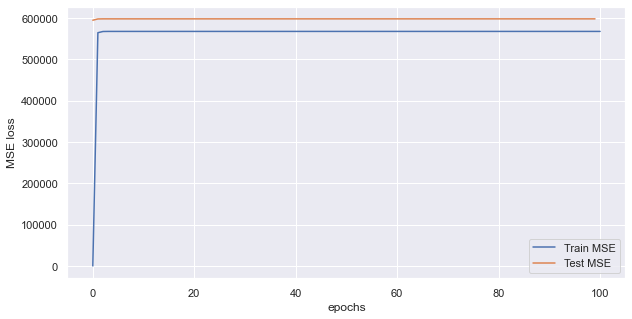

597486.75

In [77]:
model_tiu = TIUReg()
model_tiu.fit(X_train,Y_train,S_train.float(),X_test,Y_test,n_iter=100,init='closed form',viz=True)
mean_squared_error(model_tiu.predict(X_test).detach(),Y_test).item()

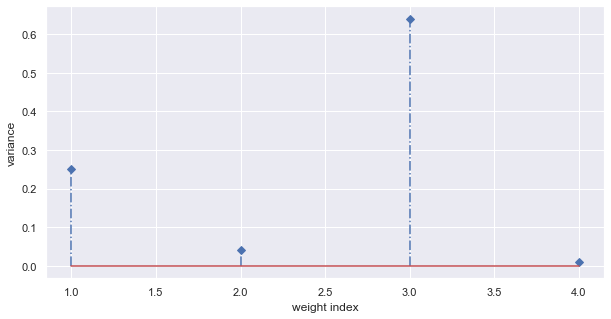

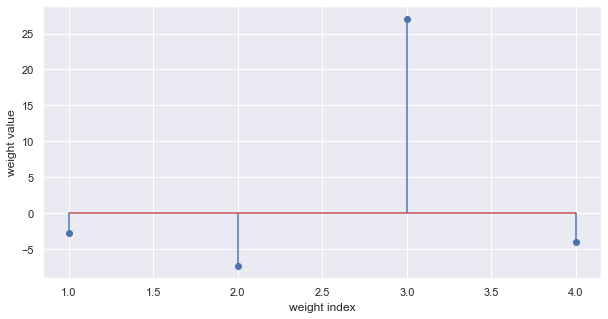

In [78]:
plt.stem([1,2,3,4],torch.diag(S_train[0]).numpy(),markerfmt='D',linefmt='-.')
plt.xlabel("weight index")
plt.ylabel("variance")
plt.show()
plt.stem([1,2,3,4],model_tiu.theta.detach())
plt.xlabel("weight index")
plt.ylabel("weight value")
plt.show()

# Experiment 3

In [15]:
data = pd.read_csv('data/exp3_data_train_10.csv')
data_test = pd.read_csv('data/exp3_data_test_10.csv')
variable_names = ['one','two','three','four']

X_train, X_test = data[variable_names].values, data_test[variable_names].values
Y_train, Y_test = data.y.values, data_test.y.values

np.round(np.cov(data[variable_names].values.T),1)

array([[841. ,   5.8, -18.9, -19. ],
       [  5.8, 821.5,  19.1,  20.2],
       [-18.9,  19.1, 828.5, 827.9],
       [-19. ,  20.2, 827.9, 827.8]])

In [16]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
Y_train = torch.from_numpy(Y_train).unsqueeze(-1).float()
Y_test = torch.from_numpy(Y_test).unsqueeze(-1) .float()

In [17]:
#S_ = torch.diag(torch.tensor([0.01,0.1,0.1,0.001])**2).float()
#S_[2,3], S_[3,2] = 0.1, 0.1
S_ = torch.from_numpy(np.cov(data[variable_names].values.T))

In [18]:
S_train = S_.unsqueeze(0).repeat([X_train.size(0),1,1])
S_test = S_.unsqueeze(0).repeat([X_test.size(0),1,1])
S_train[0]

tensor([[841.0254,   5.8103, -18.9148, -19.0199],
        [  5.8103, 821.4692,  19.0969,  20.2270],
        [-18.9148,  19.0969, 828.5276, 827.8599],
        [-19.0199,  20.2270, 827.8599, 827.8174]], dtype=torch.float64)

## Linear Regression

In [19]:
model_lr = LinearRegression(fit_intercept=False)
model_lr.fit(X_train,Y_train.squeeze())

mean_squared_error(model_lr.predict(X_test),Y_test).item()

2.6401631832122803

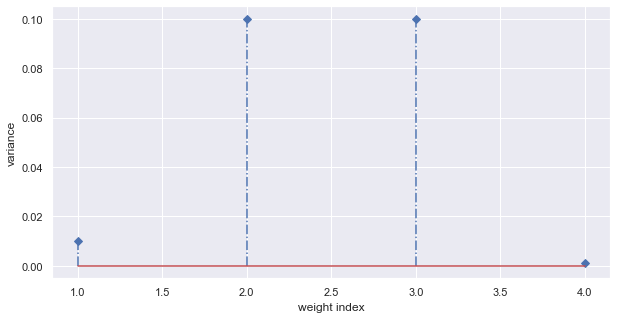

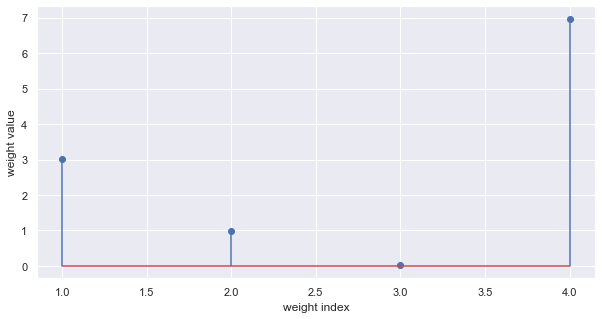

In [20]:
plt.stem([1,2,3,4],[0.01,0.1,0.1,0.001],markerfmt='D',linefmt='-.')
plt.xlabel("weight index")
plt.ylabel("variance")
plt.show()
plt.stem([1,2,3,4],model_lr.coef_)
plt.xlabel("weight index")
plt.ylabel("weight value")
plt.show()

## Bayesian Ridge

In [21]:
model_brr = BayesianRidge(fit_intercept=False)
model_brr.fit(X_train,Y_train.squeeze())

mean_squared_error(model_brr.predict(X_test),Y_test).item()

2.639824639914454

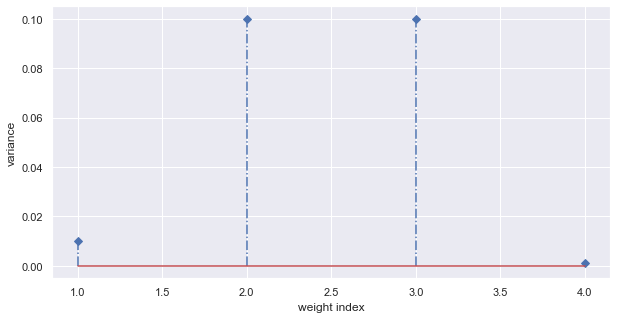

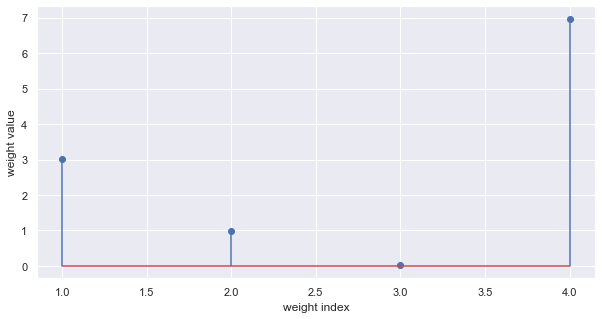

In [22]:
plt.stem([1,2,3,4],[0.01,0.1,0.1,0.001],markerfmt='D',linefmt='-.')
plt.xlabel("weight index")
plt.ylabel("variance")
plt.show()
plt.stem([1,2,3,4],model_brr.coef_)
plt.xlabel("weight index")
plt.ylabel("weight value")
plt.show()

## Our method

Negative log likelihood: 5.284478299617767


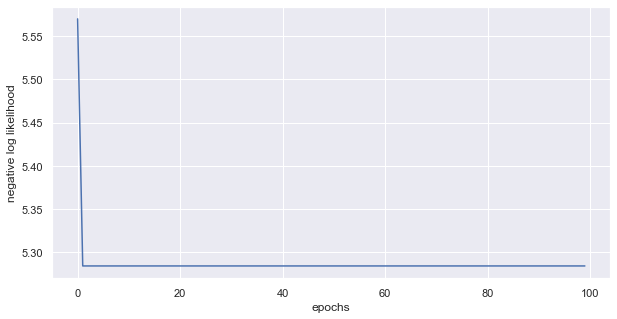

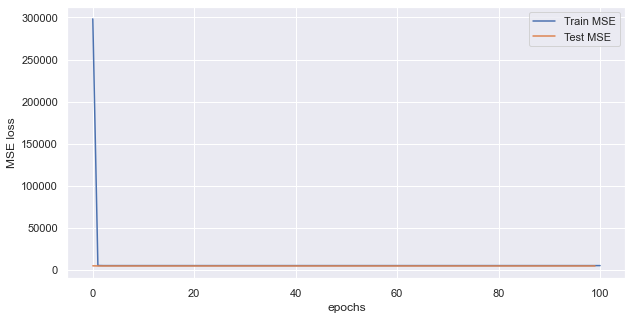

4369.12451171875

In [23]:
model_tiu = TIUReg()
model_tiu.fit(X_train,Y_train,S_train.float(),X_test,Y_test,n_iter=100,viz=True,lr=1e-1)
mean_squared_error(model_tiu.predict(X_test).detach(),Y_test).item()

Negative log likelihood: 5.284591396331787


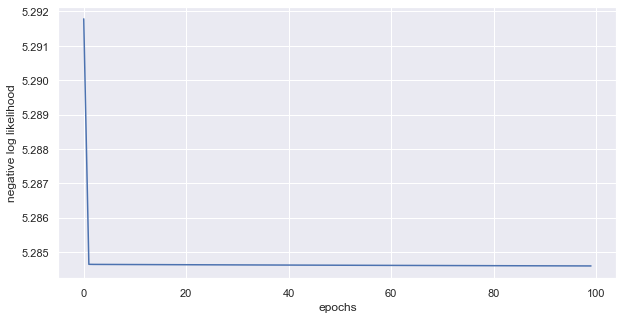

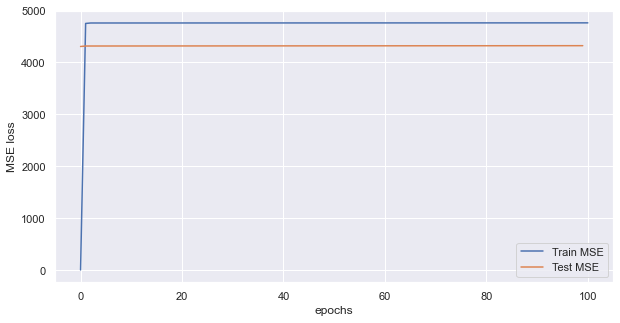

4323.50830078125

In [24]:
model_tiu = TIUReg()
model_tiu.fit(X_train,Y_train,S_train.float(),X_test,Y_test,n_iter=100,init='closed form',viz=True,lr=1e-1)
mean_squared_error(model_tiu.predict(X_test).detach(),Y_test).item()

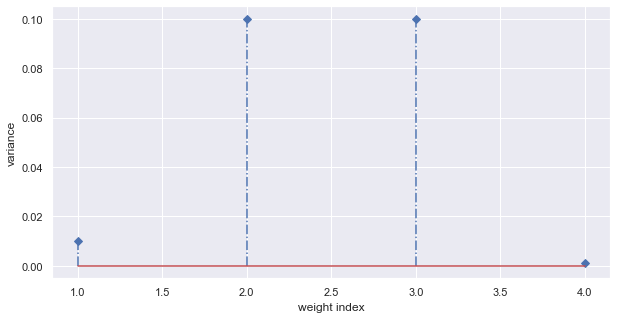

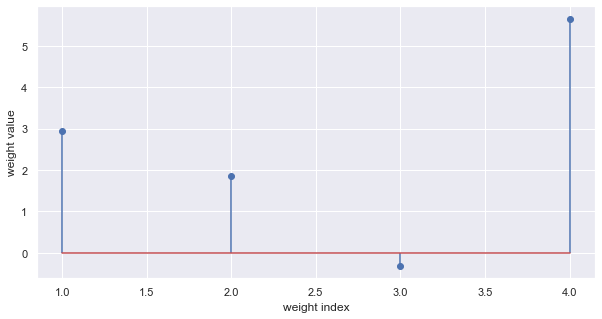

In [25]:
plt.stem([1,2,3,4],[0.01,0.1,0.1,0.001],markerfmt='D',linefmt='-.')
plt.xlabel("weight index")
plt.ylabel("variance")
plt.show()
plt.stem([1,2,3,4],model_tiu.theta.detach())
plt.xlabel("weight index")
plt.ylabel("weight value")
plt.show()

# Experiment 4

In [35]:
data = pd.read_csv('data/exp4_data_train_1.csv')
data_test = pd.read_csv('data/exp4_data_test_1.csv')
variable_names = ['one','two','three','four']

X_train, X_test = data[variable_names].values, data_test[variable_names].values
Y_train, Y_test = data.y.values, data_test.y.values

np.round(np.cov(data[variable_names].values.T),1)

array([[822.4,  16.2, -13.5, -20.1],
       [ 16.2, 862.4, -32.3, -16. ],
       [-13.5, -32.3, 839.3, -18. ],
       [-20.1, -16. , -18. , 813.4]])

In [36]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
Y_train = torch.from_numpy(Y_train).unsqueeze(-1).float()
Y_test = torch.from_numpy(Y_test).unsqueeze(-1) .float()

In [37]:
S_train = torch.diag_embed(torch.from_numpy(pd.read_csv('data/exp4_data_train_s_1.csv').values).float())**2
S_test = torch.diag_embed(torch.from_numpy(pd.read_csv('data/exp4_data_test_s_1.csv').values).float())**2
S_train[0]

tensor([[0.5082, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3891, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0066, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0006]])

## Linear Regression

In [38]:
model_lr = LinearRegression(fit_intercept=False)
model_lr.fit(X_train,Y_train.squeeze())

mean_squared_error(model_lr.predict(X_test),Y_test.squeeze()).item()

11.4530029296875

## Bayesian Ridge

In [39]:
model_brr = BayesianRidge(fit_intercept=False)
model_brr.fit(X_train,Y_train.squeeze())

mean_squared_error(model_brr.predict(X_test),Y_test.squeeze()).item()

11.452923484169748

## our method

Negative log likelihood: 2062.2238075313567


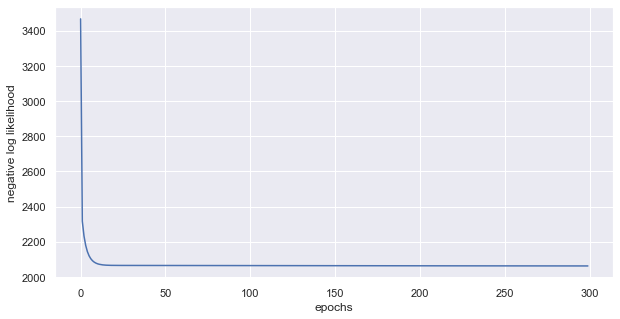

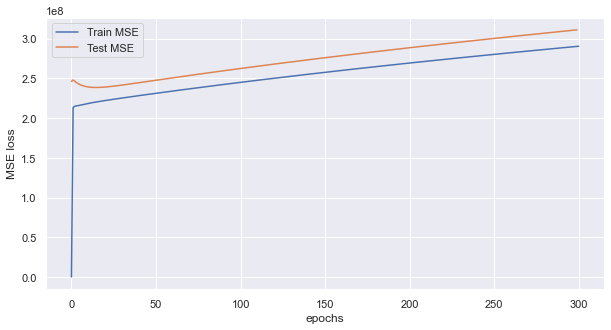

311129856.0

In [40]:
model_tiu = TIUReg()
model_tiu.fit(X_train,Y_train,S_train.float(),X_test,Y_test,n_iter=300,viz=True)
mean_squared_error(model_tiu.predict(X_test).detach(),Y_test).item()

In [ ]:
sol = torch.tensor([[3],
        [5],
        [4],
        [0.2]]).float()

mean_squared_error(X_test@sol,Y_test).item()